data loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./')

In [5]:
df

,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
0,1,30,M,Kenya,2:07:57,7677,1,KEN
1,2,29,M,Ethiopia,2:07:59,7679,2,ETH
2,3,34,M,Kenya,2:08:07,7687,3,KEN
3,4,32,M,Kenya,2:08:54,7734,4,KEN
4,5,26,M,Kenya,2:08:55,7735,5,KEN
...,...,...,...,...,...,...,...,...
26646,26640,44,F,United States,6:21:19,22879,11977,USA
26647,26641,50,F,United States,6:22:27,22947,11978,USA
26648,26648,32,F,United States,6:35:50,23750,11979,USA
26649,26650,55,F,United States,6:53:38,24818,11980,USA


In [6]:
runner_korea_18_59 = df[(df.Country=='Korea, Republic of') & (df.Age.isin(range(18,60)))]
runner_korea_18_59

,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
1663,1773,36,M,"Korea, Republic of",2:55:42,10542,1664,USA
1756,1878,43,M,"Korea, Republic of",2:56:19,10579,1757,KOR
1761,1883,45,M,"Korea, Republic of",2:56:21,10581,1762,USA
1790,1915,25,M,"Korea, Republic of",2:56:31,10591,1791,KOR
1832,1957,34,M,"Korea, Republic of",2:56:49,10609,1833,KOR
...,...,...,...,...,...,...,...,...
25810,25124,56,F,"Korea, Republic of",5:17:57,19077,11141,KOR
25814,25130,55,F,"Korea, Republic of",5:18:02,19082,11145,KOR
25990,25486,52,F,"Korea, Republic of",5:26:33,19593,11321,KOR
26461,26328,57,F,"Korea, Republic of",5:52:49,21169,11792,USA


In [7]:
runner_korea_18_59_counting = runner_korea_18_59.Age.value_counts()
runner_korea_18_59_counting

,count
Age,
56,12
58,12
59,9
57,8
53,7
52,6
54,6
48,5
55,5


In [8]:
# x 축을 그리기 위해 Age 나열
x = runner_korea_18_59_counting.index

print(type[x[0]])
print(x)

type[np.int64(56)]
Index([56, 58, 59, 57, 53, 52, 54, 48, 55, 47, 50, 49, 34, 51, 32, 45, 35, 46,
       43, 37, 44, 25, 36, 27, 31, 29, 38, 39, 40, 41],
      dtype='int64', name='Age')


In [9]:
# Age를 문자열로 변환
x = [str(i) for i in x]
print(type(x[0]))
print(x)

<class 'str'>
['56', '58', '59', '57', '53', '52', '54', '48', '55', '47', '50', '49', '34', '51', '32', '45', '35', '46', '43', '37', '44', '25', '36', '27', '31', '29', '38', '39', '40', '41']


In [10]:
# y축을 그리기 위해 나이대별로 count한 값을 저장
y = runner_korea_18_59_counting.values
print(type(y[0]))
print(y)

<class 'numpy.int64'>
[12 12  9  8  7  6  6  5  5  5  4  4  4  4  3  3  2  2  2  2  2  1  1  1
  1  1  1  1  1  1]


In [12]:
# 누적 데이터 확인하기 위해 비율 구하기
ratio = y/y.sum()
ratio_sum = ratio.cumsum()
ratio_sum

array([0.10344828, 0.20689655, 0.28448276, 0.35344828, 0.4137931 ,
       0.46551724, 0.51724138, 0.56034483, 0.60344828, 0.64655172,
       0.68103448, 0.71551724, 0.75      , 0.78448276, 0.81034483,
       0.8362069 , 0.85344828, 0.87068966, 0.88793103, 0.90517241,
       0.92241379, 0.93103448, 0.93965517, 0.94827586, 0.95689655,
       0.96551724, 0.97413793, 0.98275862, 0.99137931, 1.        ])

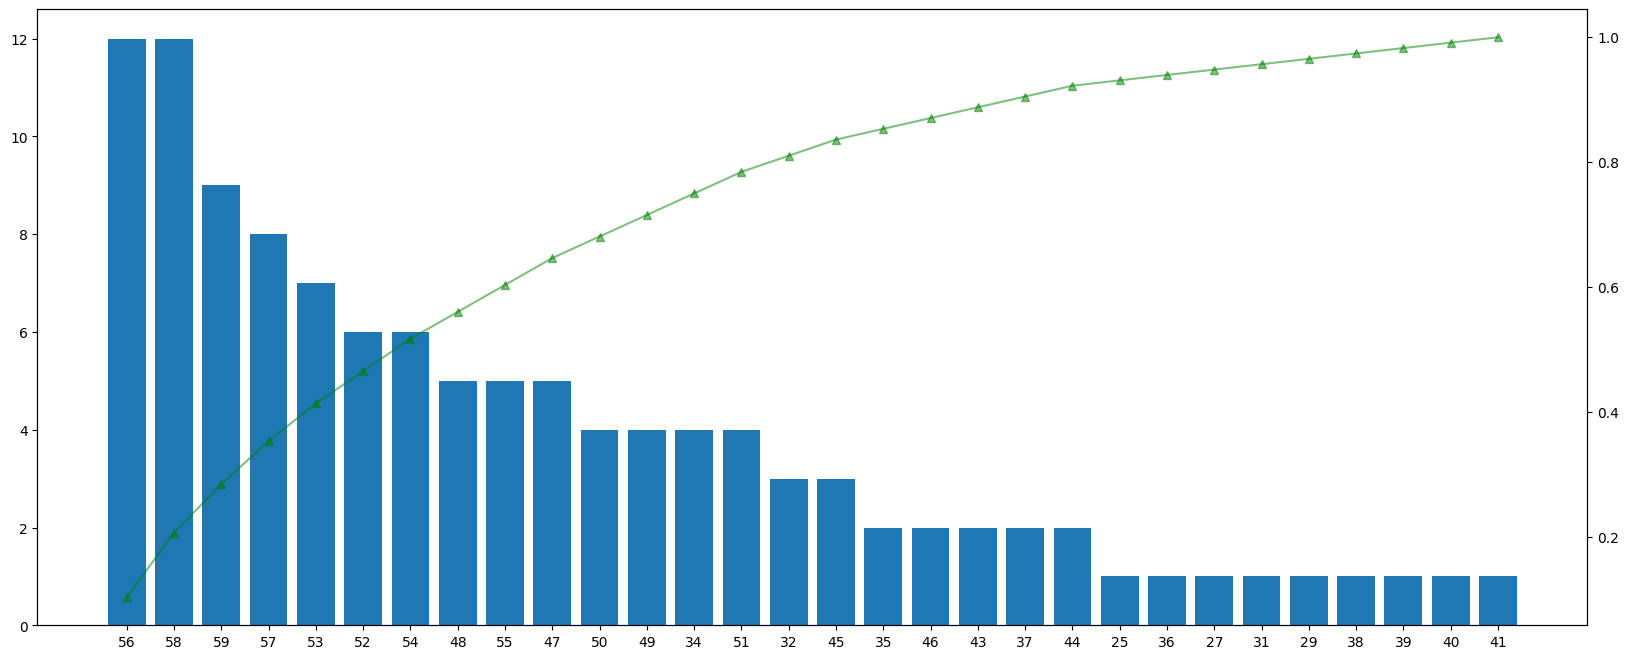

In [14]:
# 그래프 그리기
fig, barChart = plt.subplots(figsize=(20,8))

# bar 차트 그리기
barChart.bar(x,y)

lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '^-g', alpha = 0.5)

레이블 추가

/tmp/ipython-input-3007724090.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lineChart.set_yticklabels(['{0:.1%}'.format(x) for x in ranges])


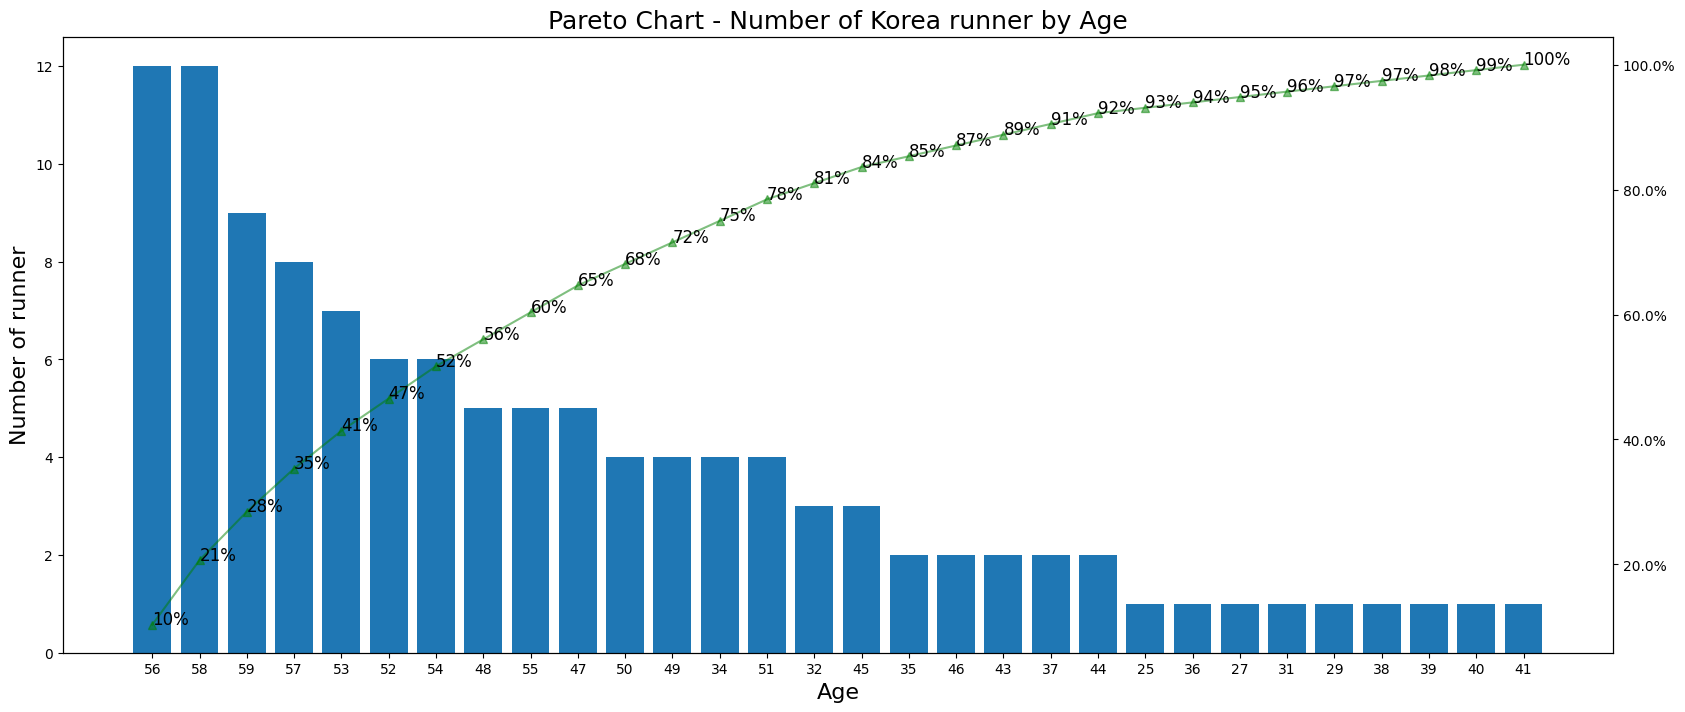

In [17]:
fig, barChart = plt.subplots(figsize=(20,8))

barChart.bar(x,y)

lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, 'g-^', alpha=0.5)

ranges = lineChart.get_yticks()
lineChart.set_yticklabels(['{0:.1%}'.format(x) for x in ranges])

ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
  lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=12)

barChart.set_xlabel('Age', fontsize=16)
barChart.set_ylabel('Number of runner', fontsize=16)

plt.title('Pareto Chart - Number of Korea runner by Age', fontsize = 18)
plt.show()